In [1]:
#PK - pharmaco kinetics
#tells you how long a drug lasts in your body
#if it disappers quickly, it's not effective
#making random forest regression

In [2]:
#PREPROCESSING

In [1]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [2]:
x=pd.read_csv("updatedPK.csv")
x
#the larger the value of AUC the longer it lasts
#x axis = time and y axis = [concentration] the area under the curve is the AUC which shows essentially whether the 
#compound lasted a long time or short time

,mol,Cmpd Name,AUC,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,...,vsa_acid,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb
0,Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...,JSF-3131,15052.0,42.364346,0,0,2,3,2,0,...,0.0,0.0,18.842079,163.31906,83.741920,45.975922,365.75299,1489,36,126.0
1,Clc1c2c([nH]c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...,JSF-3266,33043.0,42.744343,0,0,2,3,2,0,...,0.0,0.0,24.524654,166.88153,83.741920,51.658497,383.14700,1693,37,132.0
2,Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...,JSF-3263,2592.0,46.259930,0,0,2,3,3,0,...,0.0,0.0,18.842079,191.62750,83.741920,48.479675,395.77899,1872,40,136.0
3,Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...,JSF-3269,75175.0,43.877552,0,0,2,3,2,0,...,0.0,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0
4,Brc1cc2c(Cl)c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...,JSF-3271,2.0,43.614346,0,0,2,3,2,0,...,0.0,0.0,24.524654,178.65691,83.741920,51.658497,427.59799,1667,38,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CCSCC4)[nH...,4700,102.0,67.802994,0,0,2,3,3,0,...,0.0,0.0,13.757783,307.70538,23.055140,59.341228,435.61301,2478,45,160.0
186,S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF,4710,168.0,34.402515,0,0,2,4,6,0,...,0.0,0.0,8.075207,126.73853,36.977745,70.298958,273.29199,669,22,90.0
187,Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCC)CC2...,4715,4559.0,66.919617,0,0,2,3,3,0,...,0.0,0.0,11.365152,338.28323,25.899061,41.002750,444.93399,3026,49,156.0
188,Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOCc3c...,4784,128.0,80.948792,0,0,3,4,4,0,...,0.0,0.0,11.365152,418.43423,25.899061,43.506508,537.03101,5892,58,192.0


In [3]:
smiles = x['mol']
del x ['mol']
del x ['Cmpd Name']
x

,AUC,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_acid,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb
0,15052.0,42.364346,0,0,2,3,2,0,14,0,...,0.0,0.0,18.842079,163.31906,83.741920,45.975922,365.75299,1489,36,126.0
1,33043.0,42.744343,0,0,2,3,2,0,14,0,...,0.0,0.0,24.524654,166.88153,83.741920,51.658497,383.14700,1693,37,132.0
2,2592.0,46.259930,0,0,2,3,3,0,14,0,...,0.0,0.0,18.842079,191.62750,83.741920,48.479675,395.77899,1872,40,136.0
3,75175.0,43.877552,0,0,2,3,2,0,14,0,...,0.0,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0
4,2.0,43.614346,0,0,2,3,2,0,14,0,...,0.0,0.0,24.524654,178.65691,83.741920,51.658497,427.59799,1667,38,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,102.0,67.802994,0,0,2,3,3,0,9,0,...,0.0,0.0,13.757783,307.70538,23.055140,59.341228,435.61301,2478,45,160.0
186,168.0,34.402515,0,0,2,4,6,0,9,0,...,0.0,0.0,8.075207,126.73853,36.977745,70.298958,273.29199,669,22,90.0
187,4559.0,66.919617,0,0,2,3,3,0,12,0,...,0.0,0.0,11.365152,338.28323,25.899061,41.002750,444.93399,3026,49,156.0
188,128.0,80.948792,0,0,3,4,4,0,18,0,...,0.0,0.0,11.365152,418.43423,25.899061,43.506508,537.03101,5892,58,192.0


In [4]:
#dropping all of the missing values
x = x.dropna(axis = 0, how='any')
x

,AUC,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_acid,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb
0,15052.0,42.364346,0,0,2,3,2,0,14,0,...,0.0,0.0,18.842079,163.31906,83.741920,45.975922,365.75299,1489,36,126.0
1,33043.0,42.744343,0,0,2,3,2,0,14,0,...,0.0,0.0,24.524654,166.88153,83.741920,51.658497,383.14700,1693,37,132.0
2,2592.0,46.259930,0,0,2,3,3,0,14,0,...,0.0,0.0,18.842079,191.62750,83.741920,48.479675,395.77899,1872,40,136.0
3,75175.0,43.877552,0,0,2,3,2,0,14,0,...,0.0,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0
4,2.0,43.614346,0,0,2,3,2,0,14,0,...,0.0,0.0,24.524654,178.65691,83.741920,51.658497,427.59799,1667,38,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,102.0,67.802994,0,0,2,3,3,0,9,0,...,0.0,0.0,13.757783,307.70538,23.055140,59.341228,435.61301,2478,45,160.0
186,168.0,34.402515,0,0,2,4,6,0,9,0,...,0.0,0.0,8.075207,126.73853,36.977745,70.298958,273.29199,669,22,90.0
187,4559.0,66.919617,0,0,2,3,3,0,12,0,...,0.0,0.0,11.365152,338.28323,25.899061,41.002750,444.93399,3026,49,156.0
188,128.0,80.948792,0,0,3,4,4,0,18,0,...,0.0,0.0,11.365152,418.43423,25.899061,43.506508,537.03101,5892,58,192.0


In [5]:
#sorting so all the high AUC's at the top
x = x.sort_values(['AUC'], ascending = False)
x

,AUC,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_acid,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb
105,110845.0,45.128551,0,0,2,3,2,0,14,0,...,0.0,0.0,18.842079,194.49051,83.741920,45.975922,433.75000,2305,43,150.0
3,75175.0,43.877552,0,0,2,3,2,0,14,0,...,0.0,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0
122,68710.0,44.797344,0,0,2,3,3,0,14,0,...,0.0,0.0,24.524654,192.25975,83.741920,54.162254,432.69800,2563,43,154.0
21,60456.0,43.995342,0,0,2,3,2,0,14,0,...,0.0,0.0,24.524654,179.75980,83.741920,51.658497,416.69897,2282,44,150.0
74,59322.0,40.149689,0,0,1,2,4,0,9,0,...,0.0,0.0,8.075207,183.07211,10.105608,58.933807,285.34299,766,25,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.0,41.837482,0,0,1,2,3,0,12,0,...,0.0,0.0,5.682576,205.38351,24.140093,30.614649,255.32100,826,24,90.0
123,0.0,65.358856,0,0,2,3,3,0,17,0,...,0.0,0.0,0.000000,325.22504,83.741920,29.637598,503.43298,5243,56,190.0
54,0.0,44.931068,0,0,1,2,3,0,12,0,...,0.0,0.0,5.682576,221.19200,24.140093,30.614649,269.34799,947,26,96.0
141,0.0,56.410446,0,0,2,3,2,0,12,0,...,0.0,0.0,5.682576,313.43973,12.949531,21.753254,376.85898,1761,41,134.0


In [6]:
x.reset_index(drop = True, inplace = True)#changes the first column to 0-7274 because when you change stuff the order might not be right
#when concatinating it might give you errors if the indexes don't align

In [7]:
x["AUC1"]=" "
x

,AUC,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb,AUC1
0,110845.0,45.128551,0,0,2,3,2,0,14,0,...,0.0,18.842079,194.49051,83.741920,45.975922,433.75000,2305,43,150.0,
1,75175.0,43.877552,0,0,2,3,2,0,14,0,...,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0,
2,68710.0,44.797344,0,0,2,3,3,0,14,0,...,0.0,24.524654,192.25975,83.741920,54.162254,432.69800,2563,43,154.0,
3,60456.0,43.995342,0,0,2,3,2,0,14,0,...,0.0,24.524654,179.75980,83.741920,51.658497,416.69897,2282,44,150.0,
4,59322.0,40.149689,0,0,1,2,4,0,9,0,...,0.0,8.075207,183.07211,10.105608,58.933807,285.34299,766,25,96.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.0,41.837482,0,0,1,2,3,0,12,0,...,0.0,5.682576,205.38351,24.140093,30.614649,255.32100,826,24,90.0,
180,0.0,65.358856,0,0,2,3,3,0,17,0,...,0.0,0.000000,325.22504,83.741920,29.637598,503.43298,5243,56,190.0,
181,0.0,44.931068,0,0,1,2,3,0,12,0,...,0.0,5.682576,221.19200,24.140093,30.614649,269.34799,947,26,96.0,
182,0.0,56.410446,0,0,2,3,2,0,12,0,...,0.0,5.682576,313.43973,12.949531,21.753254,376.85898,1761,41,134.0,


In [8]:
for i in range(len(x)): 
    if x['AUC'][i]<= 7000:
        x.iat[i, 207] = 0
for i in range(len(x)): 
    if 15000>= x['AUC'][i]>= 7000:
        x.iat[i, 207] = 1  
for i in range(len(x)): 
    if x['AUC'][i]>= 15000:
        x.iat[i, 207] = 2  
          

In [9]:
x

,AUC,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb,AUC1
0,110845.0,45.128551,0,0,2,3,2,0,14,0,...,0.0,18.842079,194.49051,83.741920,45.975922,433.75000,2305,43,150.0,2
1,75175.0,43.877552,0,0,2,3,2,0,14,0,...,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0,2
2,68710.0,44.797344,0,0,2,3,3,0,14,0,...,0.0,24.524654,192.25975,83.741920,54.162254,432.69800,2563,43,154.0,2
3,60456.0,43.995342,0,0,2,3,2,0,14,0,...,0.0,24.524654,179.75980,83.741920,51.658497,416.69897,2282,44,150.0,2
4,59322.0,40.149689,0,0,1,2,4,0,9,0,...,0.0,8.075207,183.07211,10.105608,58.933807,285.34299,766,25,96.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.0,41.837482,0,0,1,2,3,0,12,0,...,0.0,5.682576,205.38351,24.140093,30.614649,255.32100,826,24,90.0,0
180,0.0,65.358856,0,0,2,3,3,0,17,0,...,0.0,0.000000,325.22504,83.741920,29.637598,503.43298,5243,56,190.0,0
181,0.0,44.931068,0,0,1,2,3,0,12,0,...,0.0,5.682576,221.19200,24.140093,30.614649,269.34799,947,26,96.0,0
182,0.0,56.410446,0,0,2,3,2,0,12,0,...,0.0,5.682576,313.43973,12.949531,21.753254,376.85898,1761,41,134.0,0


In [10]:
x['AUC1'].value_counts()

0    144
2     25
1     15
Name: AUC1, dtype: int64

In [11]:
del x['AUC']
x

,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,a_count,...,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb,AUC1
0,45.128551,0,0,2,3,2,0,14,0,35,...,0.0,18.842079,194.49051,83.741920,45.975922,433.75000,2305,43,150.0,2
1,43.877552,0,0,2,3,2,0,14,0,32,...,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0,2
2,44.797344,0,0,2,3,3,0,14,0,37,...,0.0,24.524654,192.25975,83.741920,54.162254,432.69800,2563,43,154.0,2
3,43.995342,0,0,2,3,2,0,14,0,36,...,0.0,24.524654,179.75980,83.741920,51.658497,416.69897,2282,44,150.0,2
4,40.149689,0,0,1,2,4,0,9,0,35,...,0.0,8.075207,183.07211,10.105608,58.933807,285.34299,766,25,96.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,41.837482,0,0,1,2,3,0,12,0,36,...,0.0,5.682576,205.38351,24.140093,30.614649,255.32100,826,24,90.0,0
180,65.358856,0,0,2,3,3,0,17,0,56,...,0.0,0.000000,325.22504,83.741920,29.637598,503.43298,5243,56,190.0,0
181,44.931068,0,0,1,2,3,0,12,0,39,...,0.0,5.682576,221.19200,24.140093,30.614649,269.34799,947,26,96.0,0
182,56.410446,0,0,2,3,2,0,12,0,48,...,0.0,5.682576,313.43973,12.949531,21.753254,376.85898,1761,41,134.0,0


In [12]:
y = x['AUC1']
del x['AUC1']

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
def variance_threshold_selector(x, threshold = 0.2):
    selector = VarianceThreshold(threshold)#0.2 and lower(these are deleted)
    selector.fit(x) #fitting to features
    return x[x.columns[selector.get_support(indices=True)]] #indice=true gives column names

In [15]:
x = variance_threshold_selector(x, 0.2)#inputting x into the function you made (def ... is a function) and you 
#save the results as x
x

,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_count,a_don,a_donacc,a_heavy,a_hyd,...,vsa_acid,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb
0,45.128551,2,3,2,14,35,2,4,28,17.0,...,0.0,0.0,18.842079,194.49051,83.741920,45.975922,433.75000,2305,43,150.0
1,43.877552,2,3,2,14,32,2,4,25,14.0,...,0.0,0.0,18.842079,181.61226,83.741920,45.975922,400.19800,1668,38,132.0
2,44.797344,2,3,3,14,37,3,6,29,16.0,...,0.0,0.0,24.524654,192.25975,83.741920,54.162254,432.69800,2563,43,154.0
3,43.995342,2,3,2,14,36,3,5,28,16.0,...,0.0,0.0,24.524654,179.75980,83.741920,51.658497,416.69897,2282,44,150.0
4,40.149689,1,2,4,9,35,3,7,19,13.0,...,0.0,0.0,8.075207,183.07211,10.105608,58.933807,285.34299,766,25,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,41.837482,1,2,3,12,36,1,4,19,13.0,...,0.0,0.0,5.682576,205.38351,24.140093,30.614649,255.32100,826,24,90.0
180,65.358856,2,3,3,17,56,0,3,36,24.0,...,0.0,0.0,0.000000,325.22504,83.741920,29.637598,503.43298,5243,56,190.0
181,44.931068,1,2,3,12,39,1,4,20,14.0,...,0.0,0.0,5.682576,221.19200,24.140093,30.614649,269.34799,947,26,96.0
182,56.410446,2,3,2,12,48,1,3,26,21.0,...,0.0,0.0,5.682576,313.43973,12.949531,21.753254,376.85898,1761,41,134.0


In [16]:
cor_matrix = x.corr().abs()
#calculates r squared
print(cor_matrix)

                       apol  ast_violation  ast_violation_ext     a_acc  \
apol               1.000000       0.616139           0.640170  0.201724   
ast_violation      0.616139       1.000000           0.898062  0.266980   
ast_violation_ext  0.640170       0.898062           1.000000  0.208609   
a_acc              0.201724       0.266980           0.208609  1.000000   
a_aro              0.279928       0.347995           0.243678  0.088502   
...                     ...            ...                ...       ...   
vsa_pol            0.014218       0.058349           0.128851  0.301881   
Weight             0.884477       0.646033           0.668259  0.107370   
weinerPath         0.840570       0.585702           0.552997  0.153994   
weinerPol          0.888572       0.564504           0.565757  0.037977   
zagreb             0.873692       0.589847           0.596407  0.120994   

                      a_aro   a_count     a_don  a_donacc   a_heavy     a_hyd  \
apol              

In [17]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
#essentially removes duplicate r squared values
print(upper_tri)

                   apol  ast_violation  ast_violation_ext     a_acc     a_aro  \
apol                NaN       0.616139           0.640170  0.201724  0.279928   
ast_violation       NaN            NaN           0.898062  0.266980  0.347995   
ast_violation_ext   NaN            NaN                NaN  0.208609  0.243678   
a_acc               NaN            NaN                NaN       NaN  0.088502   
a_aro               NaN            NaN                NaN       NaN       NaN   
...                 ...            ...                ...       ...       ...   
vsa_pol             NaN            NaN                NaN       NaN       NaN   
Weight              NaN            NaN                NaN       NaN       NaN   
weinerPath          NaN            NaN                NaN       NaN       NaN   
weinerPol           NaN            NaN                NaN       NaN       NaN   
zagreb              NaN            NaN                NaN       NaN       NaN   

                    a_count

In [18]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.9)]#r squared
#prints out features that need to be dropped 
#these features have high correlations

In [19]:
print(); print(to_drop)


['a_count', 'a_IC', 'a_nC', 'bpol', 'b_ar', 'b_count', 'b_heavy', 'b_single', 'chi0', 'chi0v', 'chi0v_C', 'chi0_C', 'chi1', 'chi1v', 'chi1v_C', 'chi1_C', 'h_ema', 'h_logP', 'h_mr', 'Kier1', 'Kier2', 'Kier3', 'KierA1', 'KierA2', 'KierA3', 'KierFlex', 'lip_don', 'mr', 'opr_nring', 'PEOE_PC-', 'PEOE_VSA-1', 'PEOE_VSA-6', 'PEOE_VSA_HYD', 'Q_VSA_HYD', 'Q_VSA_POS', 'radius', 'reactive', 'rings', 'SMR', 'TPSA', 'VDistMa', 'vdw_area', 'vdw_vol', 'vsa_don', 'vsa_hyd', 'vsa_other', 'Weight', 'weinerPath', 'weinerPol', 'zagreb']


In [20]:
x=x.drop(columns=['a_count', 'a_IC', 'a_nC', 'bpol', 'b_ar', 'b_count', 'b_heavy', 'b_single', 'chi0', 'chi0v', 'chi0v_C', 'chi0_C', 'chi1', 'chi1v', 'chi1v_C', 'chi1_C', 'h_ema', 'h_logP', 'h_mr', 'Kier1', 'Kier2', 'Kier3', 'KierA1', 'KierA2', 'KierA3', 'KierFlex', 'lip_don', 'mr', 'opr_nring', 'PEOE_PC-', 'PEOE_VSA-1', 'PEOE_VSA-6', 'PEOE_VSA_HYD', 'Q_VSA_HYD', 'Q_VSA_POS', 'radius', 'reactive', 'rings', 'SMR', 'TPSA', 'VDistMa', 'vdw_area', 'vdw_vol', 'vsa_don', 'vsa_hyd', 'vsa_other', 'Weight', 'weinerPath', 'weinerPol', 'zagreb'])

In [21]:
x

,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_don,a_donacc,a_heavy,a_hyd,a_nCl,...,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,VAdjMa,vsa_acc,vsa_acid,vsa_base,vsa_pol
0,45.128551,2,3,2,14,2,4,28,17.0,1,...,13.493403,8.338749,88.215919,10.517568,70.426331,5.906890,27.133842,0.0,0.0,45.975922
1,43.877552,2,3,2,14,2,4,25,14.0,2,...,13.808435,8.338749,88.215919,10.517568,109.574970,5.754888,27.133842,0.0,0.0,45.975922
2,44.797344,2,3,3,14,3,6,29,16.0,1,...,16.949604,9.737095,88.215919,10.517568,39.148643,5.954197,29.637598,0.0,0.0,54.162254
3,43.995342,2,3,2,14,3,5,28,16.0,1,...,14.891750,9.737095,88.215919,10.517568,39.148643,5.906890,27.133842,0.0,0.0,51.658497
4,40.149689,1,2,4,9,3,7,19,13.0,0,...,2.756747,23.878847,90.666367,42.037415,39.966759,5.321928,32.016521,0.0,0.0,58.933807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,41.837482,1,2,3,12,1,4,19,13.0,0,...,5.942323,20.338671,179.249850,5.258784,33.326015,5.321928,24.932074,0.0,0.0,30.614649
180,65.358856,2,3,3,17,0,3,36,24.0,0,...,20.248974,5.019993,197.358110,84.275879,0.000000,6.285402,29.637598,0.0,0.0,29.637598
181,44.931068,1,2,3,12,1,4,20,14.0,0,...,8.699070,20.338671,162.035490,5.258784,66.652031,5.392317,24.932074,0.0,0.0,30.614649
182,56.410446,2,3,2,12,1,3,26,21.0,1,...,11.929609,23.524246,143.595920,42.137939,107.858530,5.807355,16.070677,0.0,0.0,21.753254


In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(x)
X = scaler.transform(x) #scaling features
x1 = pd.DataFrame(X) #was an array so converting to datafram
x1.columns = x.columns
x1
#z score normalization

,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_don,a_donacc,a_heavy,a_hyd,a_nCl,...,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,VAdjMa,vsa_acc,vsa_acid,vsa_base,vsa_pol
0,-0.612147,0.215512,0.178736,-1.075907,0.205415,0.258199,-0.606463,0.375399,0.275839,1.463838,...,0.531165,-0.817132,-0.935557,-0.713379,0.415214,0.261526,-0.138582,-0.073922,-0.073922,0.320398
1,-0.732007,0.215512,0.178736,-1.075907,0.205415,0.258199,-0.606463,-0.216659,-0.432362,3.488998,...,0.584939,-0.817132,-0.935557,-0.713379,1.373793,-0.034594,-0.138582,-0.073922,-0.073922,0.320398
2,-0.643880,0.215512,0.178736,-0.163617,0.205415,1.290994,0.698674,0.572752,0.039772,1.463838,...,1.121119,-0.729564,-0.935557,-0.713379,-0.350640,0.353683,0.128132,-0.073922,-0.073922,0.894727
3,-0.720721,0.215512,0.178736,-1.075907,0.205415,1.290994,0.046105,0.375399,0.039772,1.463838,...,0.769855,-0.729564,-0.935557,-0.713379,-0.350640,0.261526,-0.138582,-0.073922,-0.073922,0.719071
4,-1.089178,-1.200711,-0.917512,0.748672,-1.013823,1.290994,1.351242,-1.400775,-0.668428,-0.561321,...,-1.301521,0.156031,-0.887014,0.122957,-0.330608,-0.878051,0.381549,-0.073922,-0.073922,1.229486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.927469,-1.200711,-0.917512,-0.163617,-0.282280,-0.774597,-0.606463,-1.400775,-0.668428,-0.561321,...,-0.757761,-0.065664,0.867803,-0.852913,-0.493211,-0.878051,-0.373128,-0.073922,-0.073922,-0.757304
180,1.326144,0.215512,0.178736,-0.163617,0.936958,-1.807392,-1.259031,1.954220,1.928307,-0.561321,...,1.684302,-1.024962,1.226523,1.243697,-1.309219,0.998912,0.128132,-0.073922,-0.073922,-0.825851
181,-0.631068,-1.200711,-0.917512,-0.163617,-0.282280,-0.774597,-0.606463,-1.203422,-0.432362,-0.561321,...,-0.287200,-0.065664,0.526791,-0.852913,0.322798,-0.740925,-0.373128,-0.073922,-0.073922,-0.757304
182,0.468785,0.215512,0.178736,-1.075907,-0.282280,-0.774597,-1.259031,-0.019306,1.220106,1.463838,...,0.264234,0.133825,0.161507,0.125624,1.331765,0.067618,-1.317096,-0.073922,-0.073922,-1.378994


In [23]:
y.reset_index(drop = True, inplace = True)
combined = pd.concat([y,x1], axis = 1)#axis=1 concatinating side to side instead of up and down
combined

,AUC1,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_don,a_donacc,a_heavy,a_hyd,...,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,VAdjMa,vsa_acc,vsa_acid,vsa_base,vsa_pol
0,2,-0.612147,0.215512,0.178736,-1.075907,0.205415,0.258199,-0.606463,0.375399,0.275839,...,0.531165,-0.817132,-0.935557,-0.713379,0.415214,0.261526,-0.138582,-0.073922,-0.073922,0.320398
1,2,-0.732007,0.215512,0.178736,-1.075907,0.205415,0.258199,-0.606463,-0.216659,-0.432362,...,0.584939,-0.817132,-0.935557,-0.713379,1.373793,-0.034594,-0.138582,-0.073922,-0.073922,0.320398
2,2,-0.643880,0.215512,0.178736,-0.163617,0.205415,1.290994,0.698674,0.572752,0.039772,...,1.121119,-0.729564,-0.935557,-0.713379,-0.350640,0.353683,0.128132,-0.073922,-0.073922,0.894727
3,2,-0.720721,0.215512,0.178736,-1.075907,0.205415,1.290994,0.046105,0.375399,0.039772,...,0.769855,-0.729564,-0.935557,-0.713379,-0.350640,0.261526,-0.138582,-0.073922,-0.073922,0.719071
4,2,-1.089178,-1.200711,-0.917512,0.748672,-1.013823,1.290994,1.351242,-1.400775,-0.668428,...,-1.301521,0.156031,-0.887014,0.122957,-0.330608,-0.878051,0.381549,-0.073922,-0.073922,1.229486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,-0.927469,-1.200711,-0.917512,-0.163617,-0.282280,-0.774597,-0.606463,-1.400775,-0.668428,...,-0.757761,-0.065664,0.867803,-0.852913,-0.493211,-0.878051,-0.373128,-0.073922,-0.073922,-0.757304
180,0,1.326144,0.215512,0.178736,-0.163617,0.936958,-1.807392,-1.259031,1.954220,1.928307,...,1.684302,-1.024962,1.226523,1.243697,-1.309219,0.998912,0.128132,-0.073922,-0.073922,-0.825851
181,0,-0.631068,-1.200711,-0.917512,-0.163617,-0.282280,-0.774597,-0.606463,-1.203422,-0.432362,...,-0.287200,-0.065664,0.526791,-0.852913,0.322798,-0.740925,-0.373128,-0.073922,-0.073922,-0.757304
182,0,0.468785,0.215512,0.178736,-1.075907,-0.282280,-0.774597,-1.259031,-0.019306,1.220106,...,0.264234,0.133825,0.161507,0.125624,1.331765,0.067618,-1.317096,-0.073922,-0.073922,-1.378994


In [24]:
x1_train, x1_test = train_test_split(combined, stratify = combined['AUC1'], test_size = 0.40, random_state = 1)
x1_cv, x1_et = train_test_split(x1_test, stratify = x1_test['AUC1'], test_size = 0.5, random_state = 1)
y_train = pd.DataFrame(x1_train['AUC1'])
del x1_train['AUC1']
y_cv = pd.DataFrame(x1_cv['AUC1'])
del x1_cv['AUC1']
del x1_test['AUC1']
y_et = pd.DataFrame(x1_et['AUC1'])
del x1_et['AUC1']
x1_train

,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_don,a_donacc,a_heavy,a_hyd,a_nCl,...,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,VAdjMa,vsa_acc,vsa_acid,vsa_base,vsa_pol
16,0.319898,0.215512,0.178736,-0.163617,0.205415,-0.774597,-0.606463,0.967457,0.984040,-0.561321,...,0.523585,-0.729564,-0.220766,1.104162,-1.309219,0.613302,-1.317096,-0.073922,-0.073922,-1.378994
131,0.161865,0.215512,0.178736,-1.075907,-0.282280,-0.774597,-1.259031,-0.019306,1.220106,1.463838,...,2.030278,0.133825,0.161507,0.125624,0.515756,0.067618,-1.317096,-0.073922,-0.073922,-1.378994
24,-0.876989,0.215512,0.178736,-1.075907,0.205415,0.258199,-0.606463,-0.414012,-0.668428,1.463838,...,-0.012594,-0.817132,-0.586049,-0.713379,0.415214,-0.140665,-0.138582,-0.073922,-0.073922,0.320398
155,-1.943791,-1.200711,-2.013761,0.748672,-0.282280,-0.774597,0.046105,-1.992833,-1.612696,-0.561321,...,-0.757761,-0.065664,-0.620029,-0.852913,-0.493211,-1.334818,0.232214,-0.073922,-0.073922,-0.358631
149,-0.360342,0.215512,0.178736,-1.988196,0.449263,-0.774597,-1.911600,-0.414012,0.039772,-0.561321,...,-0.298240,-0.702710,0.462472,-0.852913,0.322798,-0.140665,-1.583811,-0.073922,-0.073922,-1.554651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,-2.240192,-1.200711,-2.013761,0.748672,-0.282280,-0.774597,0.046105,-2.190185,-1.848763,-0.561321,...,-1.301521,-0.065664,-0.270522,-0.852913,-1.309219,-1.505206,0.232214,-0.073922,-0.073922,-0.358631
143,1.265915,1.631735,1.274985,0.748672,0.936958,0.258199,0.698674,1.362162,0.984040,-0.561321,...,2.035566,-1.024962,1.226523,0.820409,-0.493211,0.694773,0.394847,-0.073922,-0.073922,0.147151
171,-1.437908,-1.200711,-2.013761,0.748672,0.693111,-0.774597,0.046105,-1.400775,-0.668428,-0.561321,...,-1.301521,0.256588,0.428492,-0.852913,-1.309219,-0.740925,0.232214,-0.073922,-0.073922,-0.358631
78,0.281749,0.215512,0.178736,-1.075907,1.668501,1.290994,0.046105,0.770104,0.511906,1.463838,...,0.226095,-0.330585,0.811979,-0.713379,-0.350640,0.529399,-0.138582,-0.073922,-0.073922,0.719071


In [25]:
from hyperopt import hp, tpe, fmin
import itertools
import sys
np.set_printoptions(threshold=sys.maxsize)
from hyperopt.pyll import scope
from hyperopt import Trials

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 1), #number of trees
    'max_depth': hp.quniform('max_depth',1, 500, 1),#length of tree
    'min_samples_split': hp.quniform('min_samples_split', 2, 200, 1)
}



In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balance_accuracy_score
#try with balance accuracy score


ImportError: cannot import name 'balance_accuracy_score' from 'sklearn.metrics' (/Users/khadijamughal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
def rf(params):
    clf=RandomForestClassifier(n_estimators=np.int64(params['n_estimators']), 
                               max_depth=params['max_depth'],
                               min_samples_split=np.int64(params['min_samples_split']))
                               
    clf.fit(x1_train, np.ravel(y_train))
    pred=clf.predict(x1_cv)
    score = accuracy_score(pred, y_cv)
    score = score *-1
    return score

In [31]:
y_train = y_train.astype('int')
y_cv = y_cv.astype('int')
y_et = y_et.astype('int')

In [31]:
tpe_algorithm = tpe.suggest
num_eval = 2000
trials = Trials()
best_param = fmin(rf, space, algo=tpe.suggest, trials=trials, max_evals=num_eval, rstate=np.random.RandomState(1))
print(best_param)

100%|████| 2000/2000 [24:21<00:00,  1.37trial/s, best loss: -0.8918918918918919]
{'max_depth': 385.0, 'min_samples_split': 5.0, 'n_estimators': 839.0}


In [32]:
clf = RandomForestClassifier(max_depth = 385, min_samples_split =5, n_estimators = 839)
clf.fit(x1_train, np.ravel(y_train))

y_pred1cv= clf.predict(x1_cv)
y_pred1et= clf.predict(x1_et)

acc_cv1 = accuracy_score(y_cv, y_pred1cv)
acc_et1 = accuracy_score(y_et, y_pred1et)


#table
data = {'accuracy': [acc_cv1, acc_et1],
        }
df = pd.DataFrame(data, index=['Cross Validation', 'Test'])
df

,accuracy
Cross Validation,0.864865
Test,0.783784


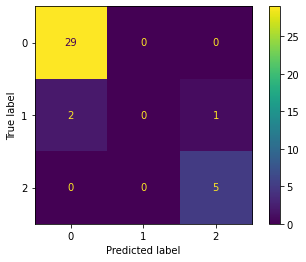

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
classifier_cv = clf.fit(x1_cv, np.ravel(y_cv))
pred=clf.predict(x1_cv)
cv_matrix = confusion_matrix(y_cv, pred)
disp = plot_confusion_matrix(classifier_cv, x1_cv, y_cv)

In [44]:
y_cv.value_counts()

AUC1
0       29
2        5
1        3
dtype: int64

In [35]:
x1_cv

,apol,ast_violation,ast_violation_ext,a_acc,a_aro,a_don,a_donacc,a_heavy,a_hyd,a_nCl,...,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,VAdjMa,vsa_acc,vsa_acid,vsa_base,vsa_pol
77,0.190302,0.215512,0.178736,1.660962,-0.526128,0.258199,1.351242,0.375399,-1.140562,-0.561321,...,-0.841999,1.579909,-1.236521,1.096589,-0.071706,0.353683,0.057285,-0.073922,-0.073922,0.187115
181,-0.631068,-1.200711,-0.917512,-0.163617,-0.282280,-0.774597,-0.606463,-1.203422,-0.432362,-0.561321,...,-0.287200,-0.065664,0.526791,-0.852913,0.322798,-0.740925,-0.373128,-0.073922,-0.073922,-0.757304
47,0.187256,0.215512,0.178736,0.748672,-0.282280,-0.774597,0.046105,0.178046,0.275839,-0.561321,...,-0.124161,0.106971,0.128741,1.309270,-1.309219,0.261526,0.447808,-0.073922,-0.073922,-0.216643
141,-0.789385,0.215512,0.178736,-1.075907,-0.526128,-0.774597,-1.259031,-0.808717,-0.668428,-0.561321,...,0.596783,-1.024962,-0.586049,-0.852913,1.189194,-0.485244,-1.317096,-0.073922,-0.073922,-1.378994
170,2.027344,1.631735,1.274985,0.748672,0.936958,-1.807392,-0.606463,1.954220,1.692240,-0.561321,...,2.035566,-1.024962,1.600301,1.798946,-0.493211,0.998912,0.394847,-0.073922,-0.073922,-0.650195
53,0.317423,0.215512,0.178736,0.748672,-0.526128,0.258199,0.698674,0.375399,-0.904495,-0.561321,...,-0.841999,1.633618,-0.887014,1.096589,-0.071706,0.353683,-0.548057,-0.073922,-0.073922,-0.211558
146,-1.437908,-1.200711,-2.013761,0.748672,0.693111,-0.774597,0.046105,-1.400775,-0.904495,-0.561321,...,-1.301521,0.256588,0.428492,-0.852913,-1.309219,-0.740925,0.232214,-0.073922,-0.073922,-0.358631
147,0.521039,0.215512,0.178736,-0.163617,-1.013823,0.258199,0.046105,-0.216659,0.275839,-0.561321,...,-0.757761,0.156031,-0.139457,0.582893,0.485401,-0.034594,1.826777,-0.073922,-0.073922,1.258069
36,1.256122,1.631735,1.274985,0.748672,-0.282280,1.290994,1.351242,0.967457,1.692240,1.463838,...,0.807994,0.160679,0.884793,0.331140,0.515756,0.529399,0.128132,-0.073922,-0.073922,0.923311
122,1.016403,0.215512,1.274985,-0.163617,0.449263,1.290994,0.698674,0.572752,1.220106,-0.561321,...,-0.214002,0.156031,0.876298,-0.395644,0.485401,0.353683,1.826777,-0.073922,-0.073922,1.656742


In [34]:
y_cv

,AUC1
77,0
181,0
47,0
141,0
170,0
53,0
146,0
147,0
36,1
122,0


In [37]:
from sklearn.metrics import matthews_corrcoef

In [38]:
fp = cv_matrix.sum(axis=0) - np.diag(cv_matrix)
fn = cv_matrix.sum(axis=1) - np.diag(cv_matrix)
tp = np.diag(cv_matrix)
tn = cv_matrix.sum() - (fp + fn + tp)

In [39]:
specificitycv = tn / (tn+fp) # specificity for cross val.
sensitivitycv = tp / (tp+fn) # sensitivity for cross val.
balancedaccuracycv = (sensitivitycv + specificitycv) / 2
mcc_cv0 = (tp[0]*tn[0] - fp[0]*fn[0]) / ((tp[0]+fp[0])*(tp[0]+fn[0])*(tn[0]+fp[0])*(tn[0]+fn[0]))**0.5
mcc_cv1 = (tp[1]*tn[1] - fp[1]*fn[1]) / ((tp[1]+fp[1])*(tp[1]+fn[1])*(tn[1]+fp[1])*(tn[1]+fn[1]))**0.5
mcc_cv2 = (tp[2]*tn[2] - fp[2]*fn[2]) / ((tp[2]+fp[2])*(tp[2]+fn[2])*(tn[0]+fp[2])*(tn[0]+fn[2]))**0.5

/var/folders/p_/665xkkjx28zdr3jqxqhthkgh0000gn/T/ipykernel_12637/1082607107.py:5: RuntimeWarning: invalid value encountered in true_divide
  mcc_cv1 = (tp[1]*tn[1] - fp[1]*fn[1]) / ((tp[1]+fp[1])*(tp[1]+fn[1])*(tn[1]+fp[1])*(tn[1]+fn[1]))**0.5


In [40]:
specificitycv

array([0.75   , 1.     , 0.96875])

In [41]:
sensitivitycv

array([1., 0., 1.])

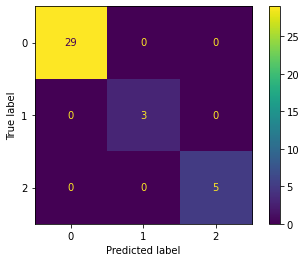

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
classifier_et = clf.fit(x1_et, np.ravel(y_et))
pred=clf.predict(x1_et)
et_matrix = confusion_matrix(y_et, pred)
disp = plot_confusion_matrix(classifier_et, x1_et, y_et)

In [85]:
FP = et_matrix.sum(axis=0) - np.diag(et_matrix)
FN = et_matrix.sum(axis=1) - np.diag(et_matrix)
TP = np.diag(et_matrix)
TN = et_matrix.sum() - (FP + FN + TP)

In [99]:
specificityet = TN / (TN+FP) # specificity for cross val.
sensitivityet = TP / (TP+FN) # sensitivity for cross val.
balancedaccuracyet = (specificityet + sensitivityet) / 2
mcc_et0 = (TP[0]*TN[0] - FP[0]*FN[0]) / ((TP[0]+FP[0])*(TP[0]+FN[0])*(TN[0]+FP[0])*(TN[0]+FN[0]))**0.5
mcc_et1 = (TP[1]*TN[1] - FP[1]*FN[1]) / ((TP[1]+FP[1])*(TP[1]+FN[1])*(TN[1]+FP[1])*(TN[1]+FN[1]))**0.5
mcc_et2 = (TP[2]*TN[2] - FP[2]*FN[2]) / ((TP[2]+FP[2])*(TP[2]+FN[2])*(TN[0]+FP[2])*(TN[0]+FN[2]))**0.5

In [107]:
data = {'sensitivity': [sensitivitycv, sensitivityet],
        'specificity': [specificitycv, specificityet], 
        'balanced accuracy':[balancedaccuracycv, balancedaccuracyet],
        'mcc 0':[mcc_cv0,mcc_et0],
        'mcc 1':[mcc_cv1,mcc_et1],
        'mcc 2':[mcc_cv2,mcc_et2]
        }
df = pd.DataFrame(data, index=['Cross Validation', 'Test'])
df
#NaN is 0/0

,sensitivity,specificity,balanced accuracy,mcc 0,mcc 1,mcc 2
Cross Validation,"[1.0, 0.0, 1.0]","[0.75, 1.0, 0.96875]","[0.875, 0.5, 0.984375]",0.837623,NaN,4.36663
Test,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",1.000000,1.0,4.00000
